In [1]:
# https://keras.io/examples/vision/image_classification_from_scratch/

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

user = "Ayoola"

if user == "Hoang":
  pass
elif user == "Nour":
  pass # fill in your directory
elif user == "Vu":
  pass # fill in your directory
elif user == "Pedro":
  pass # fill in your directory
elif user == "Ayoola":
  os.chdir('/content/drive/My Drive/Colab Notebooks/Tutorial/11.1')
elif user == "Steven":
  pass # fill in your directory
elif user == "Dennis":
  pass # fill in your directory
elif user == "Ahmed":
  pass # fill in your directory

In [ ]:
# Get the data if you want ther full dataset

# !curl -O https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip
# !unzip -q kagglecatsanddogs_3367a.zip

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
# num_skipped = 0
# for folder_name in ("Cat", "Dog"):
#     folder_path = os.path.join("PetImages", folder_name)
#     for fname in os.listdir(folder_path):
#         fpath = os.path.join(folder_path, fname)
#         try:
#             fobj = open(fpath, "rb")
#             is_jfif = tf.compat.as_bytes("JFIF") in fobj.peek(10)
#         finally:
#             fobj.close()

#         if not is_jfif:
#             num_skipped += 1
#             # Delete corrupted image
#             os.remove(fpath)

# print("Deleted %d images" % num_skipped)

In [ ]:
# import random 
# for val in ["Cat", "Dog"]:
#   files = os.listdir(f'./PetImages/{val}')
#   len_file = len(files)
#   select = random.sample(files, len_file - 500)
#   for item in select:
#     os.remove(f"./PetImages/{val}/" + item)
#   print(val, len(os.listdir(f'./PetImages/{val}')))

In [ ]:
image_size = (180, 180)
batch_size = 32

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "PetImages",
    validation_split=0.2,
    subset="training",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "PetImages",
    validation_split=0.2,
    subset="validation",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)

Found 1000 files belonging to 2 classes.
Using 800 files for training.
Found 1000 files belonging to 2 classes.
Using 200 files for validation.


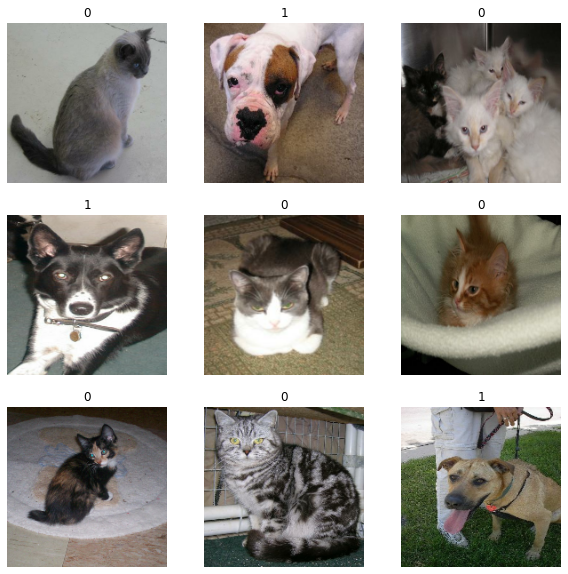

In [ ]:
# import matplotlib.pyplot as plt

# plt.figure(figsize=(10, 10))
# for images, labels in train_ds.take(1):
#     for i in range(9):
#         ax = plt.subplot(3, 3, i + 1)
#         plt.imshow(images[i].numpy().astype("uint8"))
#         plt.title(int(labels[i]))
#         plt.axis("off")

In [ ]:
train_ds = train_ds.prefetch(buffer_size=32)
val_ds = val_ds.prefetch(buffer_size=32)

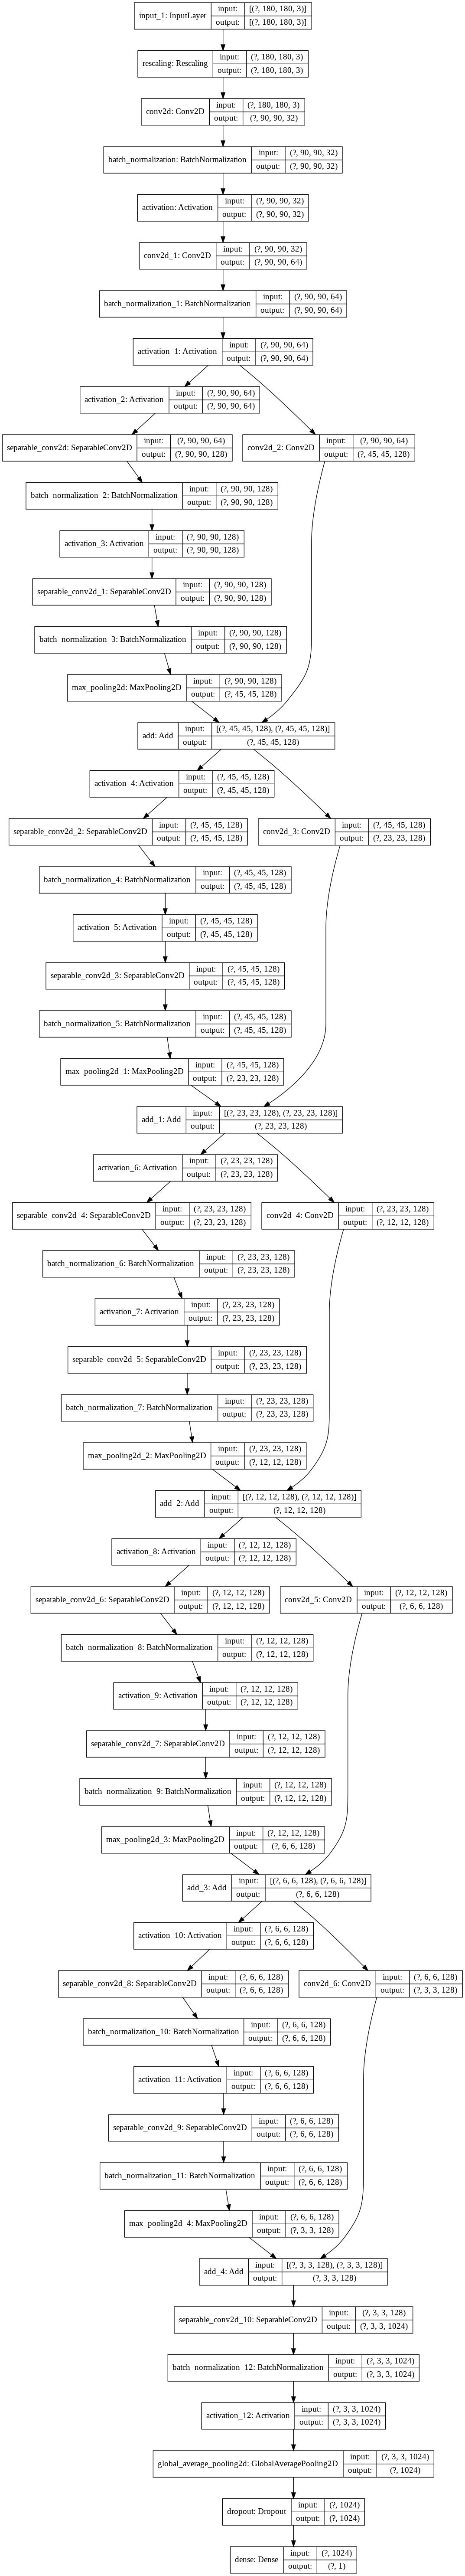

In [ ]:
def make_model(input_shape, num_classes):
    inputs = keras.Input(shape=input_shape)
    # Image augmentation block
    # x = data_augmentation(inputs)
    x = inputs

    # Entry block
    x = layers.experimental.preprocessing.Rescaling(1.0 / 255)(x)
    x = layers.Conv2D(32, 3, strides=2, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    x = layers.Conv2D(64, 3, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    previous_block_activation = x  # Set aside residual

    for size in [128, 256, 512, 728]:
        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(size, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(size, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.MaxPooling2D(3, strides=2, padding="same")(x)

        # Project residual
        residual = layers.Conv2D(size, 1, strides=2, padding="same")(
            previous_block_activation
        )
        x = layers.add([x, residual])  # Add back residual
        previous_block_activation = x  # Set aside next residual

    x = layers.SeparableConv2D(1024, 3, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    x = layers.GlobalAveragePooling2D()(x)
    if num_classes == 2:
        activation = "sigmoid"
        units = 1
    else:
        activation = "softmax"
        units = num_classes

    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(units, activation=activation)(x)
    return keras.Model(inputs, outputs)


model = make_model(input_shape=image_size + (3,), num_classes=2)
keras.utils.plot_model(model, show_shapes=True)

In [ ]:
epochs = 20

callbacks = [
    keras.callbacks.ModelCheckpoint("save_at_{epoch}.h5"),
]
model.compile(
    optimizer=keras.optimizers.Adam(1e-3),
    loss="binary_crossentropy",
    metrics=["accuracy"],
)
model.fit(
    train_ds, epochs=epochs, callbacks=callbacks, validation_data=val_ds,
)

Epoch 1/20
25/25 [==============================] - 412s 16s/step - loss: 0.7290 - accuracy: 0.5500 - val_loss: 0.6940 - val_accuracy: 0.4650
Epoch 2/20
25/25 [==============================] - 5s 197ms/step - loss: 0.6270 - accuracy: 0.6575 - val_loss: 0.6974 - val_accuracy: 0.4650
Epoch 3/20
25/25 [==============================] - 5s 197ms/step - loss: 0.5411 - accuracy: 0.7325 - val_loss: 0.7039 - val_accuracy: 0.4650
Epoch 4/20
25/25 [==============================] - 5s 197ms/step - loss: 0.4421 - accuracy: 0.7850 - val_loss: 0.7101 - val_accuracy: 0.4650
Epoch 5/20
25/25 [==============================] - 5s 196ms/step - loss: 0.3862 - accuracy: 0.8325 - val_loss: 0.7091 - val_accuracy: 0.4650
Epoch 6/20
25/25 [==============================] - 5s 198ms/step - loss: 0.2871 - accuracy: 0.8775 - val_loss: 0.7360 - val_accuracy: 0.4650
Epoch 7/20
25/25 [==============================] - 5s 196ms/step - loss: 0.1791 - accuracy: 0.9312 - val_loss: 0.7425 - val_accuracy: 0.4650
Epoch 

In [ ]:
img = keras.preprocessing.image.load_img(
    "PetImages/Cat/8873.jpg", target_size=image_size
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create batch axis

predictions = model.predict(img_array)
score = predictions[0]
print(
    "This image is %.2f percent cat and %.2f percent dog."
    % (100 * (1 - score), 100 * score)
)

This image is 95.87 percent cat and 4.13 percent dog.
